In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import normalize
from yellowbrick.regressor import ResidualsPlot
from sklearn.model_selection import train_test_split

# Question 1

Minimum value of L(θ) is 1.2621774483536189e-27


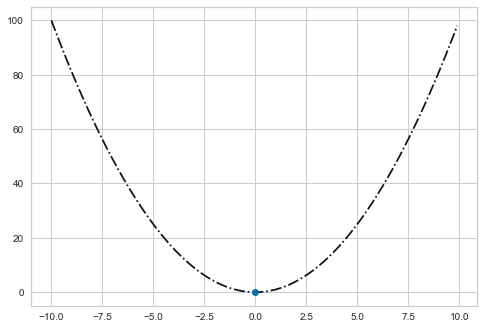

In [3]:
def L(theta):
    return theta*theta
    

theta = np.arange(-10,10,0.1)
L_theta = []
for t in theta:
    L_theta.append(L(t))

min_L_theta = min(L_theta)
min_loc = np.argwhere(L_theta == min_L_theta)[0,0]

print('Minimum value of L(θ) is', min_L_theta)
plt.figure()
plt.plot(theta, L_theta, 'k-.')
plt.plot(theta[min_loc], min_L_theta, 'bo')
plt.show()

# Question 2

Minimum value of L(θ1, θ2) is 2.5243548967072378e-27


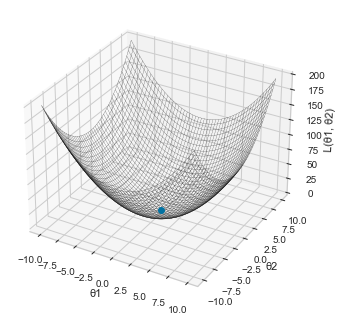

In [4]:
def L(theta1, theta2):
    return theta1*theta1 + theta2*theta2


theta1 = np.arange(-10,10,0.1)
theta2 = np.arange(-10,10,0.1)
L_theta1_theta2 = np.zeros((len(theta1),len(theta2)))
for i in range(len(theta1)):
    for j in range(len(theta2)):
        L_theta1_theta2[i][j] = L(theta1[i], theta2[j])

min_L_theta1_theta2 = np.min(L_theta1_theta2)
print('Minimum value of L(θ1, θ2) is', min_L_theta1_theta2)
min_loc = np.argwhere(L_theta1_theta2 == min_L_theta1_theta2)

x, y = np.meshgrid(theta1, theta2)
z = L(x, y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(x, y, z, color='k', linewidth=0.2)
ax.plot(theta1[min_loc[0,0]], theta2[min_loc[0,1]], z[min_loc[0,0],min_loc[0,1]], 'bo')
ax.set_xlabel('θ1')
ax.set_ylabel('θ2')
ax.set_zlabel('L(θ1, θ2)')
plt.show()

# Question 3

## Part A

Minimum value of L(θ0, θ1) is 1595.0863839999718
θ0 and θ1 values for minimum value of L(θ0, θ1) are  47.39999999999446 0.008000000000000895  respectively.


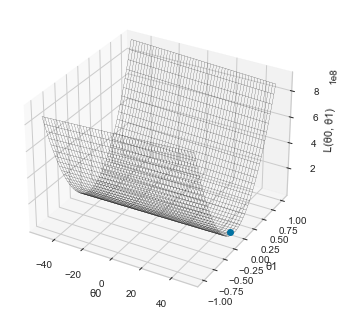

In [6]:
def L(x, y, theta0, theta1):
    return np.sum(np.square(y - (theta0 - (theta1*x))))


theta0 = np.arange(-50,50,0.05)
theta1 = np.arange(-1,1,0.001)
L_theta0_theta1 = np.zeros((len(theta1),len(theta0)))
data = pd.read_excel('data.xlsx')
data_x = np.reshape(np.array(data.x), (-1, 1))
data_y = np.reshape(np.array(data.y), (-1, 1))

for i in range(len(theta1)):
    for j in range(len(theta0)):
        L_theta0_theta1[i][j] = L(data_x, data_y, theta0[j], theta1[i])

min_L_theta0_theta1 = np.min(L_theta0_theta1)
print('Minimum value of L(θ0, θ1) is', min_L_theta0_theta1)

min_loc = np.argwhere(L_theta0_theta1 == min_L_theta0_theta1)
print('θ0 and θ1 values for minimum value of L(θ0, θ1) are ', theta0[min_loc[0,1]], theta1[min_loc[0,0]], ' respectively.')

x, y = np.meshgrid(theta0, theta1)
z = L_theta0_theta1

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(x, y, z, color='k', linewidth=0.2)
ax.plot(theta0[min_loc[0,1]], theta1[min_loc[0,0]], z[min_loc[0,0],min_loc[0,1]], 'bo')
ax.set_xlabel('θ0')
ax.set_ylabel('θ1')
ax.set_zlabel('L(θ0, θ1)')
plt.show()

## Part B (to be completed)

In [14]:
#Question 3b
temp = np.copy(data_x)
x = np.ones((np.size(temp,0),2))
x[:,1] = temp[:,0]

print('determinant of x.T*x = ',np.linalg.det(np.matmul(x.T,x)))

theta = np.matmul(np.linalg.inv(np.matmul(x.T,x)),np.matmul(x.T,data_y))
print('For minima, theta0 = ',theta[0,0],' and theta1 = ',theta[1,0])

determinant of x.T*x =  5618077959.999997
For minima, theta0 =  49.23762989433493  and theta1 =  -0.008611934783475328


# Question 4 (to be completed)

In [71]:
#Question 4
LS = np.sum(np.square(data_y - (theta[0,0] - (theta[1,0]*temp))))
print('Value of L using theta values from LS method(Pseudo Inverse) = ',LS)
print()
for i in range(10):
    L_other_value = np.sum(np.square(data_y - (np.random.randint(theta0.shape[0]) - (np.random.randint(theta1.shape[0])*temp))))
    print('Value of L for some other theta = ',L_other_value)

Value of L using theta values from LS method(Pseudo Inverse) =  264172.10040589137

Value of L for some other theta =  2574691868772.75
Value of L for some other theta =  1704783651232633.8
Value of L for some other theta =  3008945931637496.0
Value of L for some other theta =  136719537619968.75
Value of L for some other theta =  2591364593799260.0
Value of L for some other theta =  2043618914800357.8
Value of L for some other theta =  625253821170334.8
Value of L for some other theta =  46351053651546.75
Value of L for some other theta =  153640724195388.75
Value of L for some other theta =  3156642120037978.0


We see that the value L for the $ \theta_{0} $ and $ \theta_{1} $ found in the Question 4 gives a lesser value that other values found. 
From this we can say that the Pseudo Inverse method would give the least values for the given function and this is the reason why Pseudo Inverse is also called LS method.

# Question 5

## Part A

In [16]:
x = np.array([
        [1, 2],
        [2, 4],
        [3, 6], 
        [4, 8]
    ])
y = np.array([
        [2],
        [3],
        [4],
        [5]
    ])

print(' X Shape ->', x.shape, '\n', 'Y Shape ->', y.shape)

 X Shape -> (4, 2) 
 Y Shape -> (4, 1)


In [20]:
reg = LinearRegression().fit(x, y)
print('Score: ', reg.score(x, y))
print('Coefficient: ', reg.coef_)
print('Intercept: ', reg.intercept_)

Score:  1.0
Coefficient:  [[0.2 0.4]]
Intercept:  [1.]


In [56]:
y_pred = reg.predict(x)

print('RMSE ->', mean_squared_error(y, y_pred))

RMSE -> 0.0


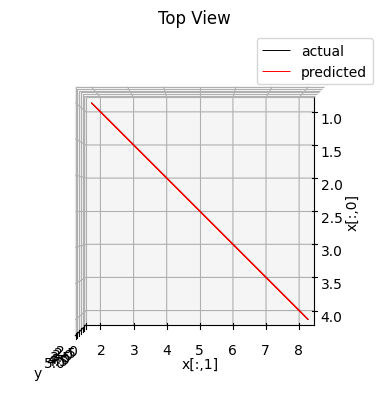

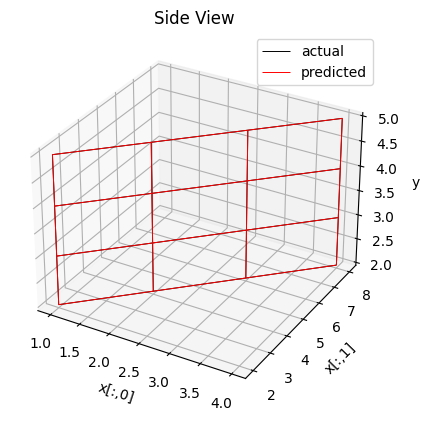

In [53]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(x[:,0], x[:,1], y, color='k', linewidth=0.7, label='actual')
ax.plot_wireframe(x[:,0], x[:,1], y_pred, color='r', linewidth=0.7, label='predicted')
ax.set_xlabel('x[:,0]')
ax.set_ylabel('x[:,1]')
ax.set_zlabel('y')
ax.view_init(90, 0)
plt.legend()
plt.title('Top View')
plt.show()

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(x[:,0], x[:,1], y, color='k', linewidth=0.7, label='actual')
ax.plot_wireframe(x[:,0], x[:,1], y_pred, color='r', linewidth=0.7, label='predicted')
ax.set_xlabel('x[:,0]')
ax.set_ylabel('x[:,1]')
ax.set_zlabel('y')
plt.legend()
plt.title('Side View')
plt.show()

## Part B

In [76]:
def normal(X,y):
    return np.dot(np.dot(np.linalg.pinv(np.dot(X.T,X)),X.T),y)

x_new = np.c_[x,np.ones(len(x))]
normal(x_new,y)

array([[0.2],
       [0.4],
       [1. ]])

In [67]:
x_trans = np.transpose(x)
XX = np.dot(x_trans, x)
XY = np.dot(x_trans, y)

print('Checking invertability')
print('----------------------')

print('X\'X\n', XX)
print('Rank of X\'X -> ', np.linalg.matrix_rank(XX))
print('Rank of X -> ', np.linalg.matrix_rank(x))

print('----------------------')
print('Since the ranks are same, the matrix X is not invertible.')

Checking invertability
----------------------
X'X
 [[ 30  60]
 [ 60 120]]
Rank of X'X ->  1
Rank of X ->  1
----------------------
Since the ranks are same, the matrix X is not invertible.


# Question 6

## Part A

In [77]:
real_estate_data = pd.read_excel('real_estate_valuation_dataset.xlsx')
real_estate_data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [98]:
x1 = np.reshape(np.array(real_estate_data['X1 transaction date']), (-1, 1))
x2 = np.reshape(np.array(real_estate_data['X2 house age']), (-1, 1))
x3 = np.reshape(np.array(real_estate_data['X3 distance to the nearest MRT station']), (-1, 1))
x4 = np.reshape(np.array(real_estate_data['X4 number of convenience stores']), (-1, 1))
x5 = np.reshape(np.array(real_estate_data['X5 latitude']), (-1, 1))
x6 = np.reshape(np.array(real_estate_data['X6 longitude']), (-1, 1))
X = np.hstack((x1, x2, x3, x4, x5, x6))
y = np.reshape(np.array(real_estate_data['Y house price of unit area']), (-1, 1))

In [101]:
reg = LinearRegression().fit(X, y)
print('Score: ', reg.score(X, y))
print('Coefficient: ', reg.coef_)
print('Intercept: ', reg.intercept_)

y_pred = reg.predict(X)

print('RMSE ->', mean_squared_error(y, y_pred))

Score:  0.5823850447850796
Coefficient:  [[ 5.14901721e+00 -2.69696735e-01 -4.48750825e-03  1.13332498e+00
   2.25470143e+02 -1.24290612e+01]]
Intercept:  [-14441.98271918]
RMSE -> 77.12902119719622


## Part B

The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable and the dependent variable. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.

The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant. This property of holding the other variables constant is crucial because it allows you to assess the effect of each variable in isolation from the others.

## Part C

In [108]:
X_norm = normalize(X)

reg = LinearRegression().fit(X_norm, y)
print('Score: ', reg.score(X_norm, y))
print('Coefficient: ', reg.coef_)
print('Intercept: ', reg.intercept_)

y_pred = reg.predict(X_norm)

print('RMSE ->', mean_squared_error(y, y_pred))

Score:  0.6579294413107768
Coefficient:  [[ 1.00568935e+04 -5.81385070e+02 -4.14031753e+01  8.91774760e+02
   6.26479098e+05 -2.95466375e+05]]
Intercept:  [64.34307877]
RMSE -> 63.17677813645316


## Part D

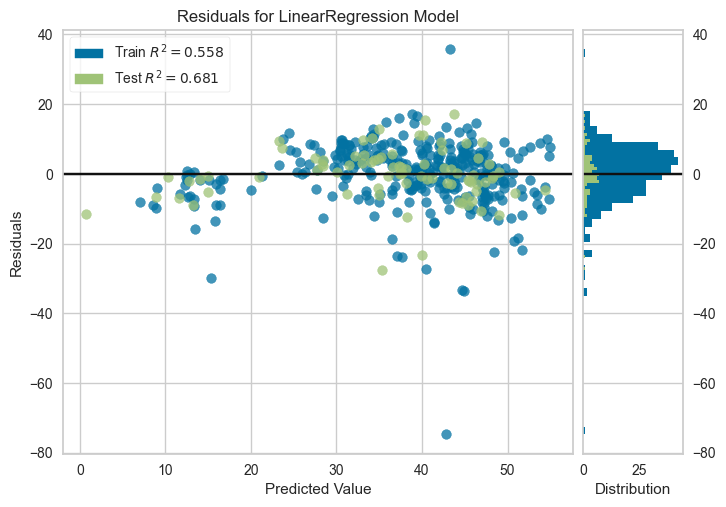

In [112]:
# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure
plt.show()

## Part E